# Ranging and Ransac

We'll use the following imports:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

If you get an error from importing sklearn, then you will have to install it using:
conda install scikit-learn

For the exercise we will be using the data taken from a lidar by a robot in a hallway. The data is saved in `laser.csv` and we can import this in Python using numpy as such:

In [2]:
laser = np.genfromtxt('laser.csv', delimiter=',')

The file contains only a single rotation of the lidar. You can open the file in any text editor to get a look at the data. Each number in the file is the distance measured in meters. The lidar starts measuring at 135 degrees and ends at -135 degrees and it rotates the same amount between each measurement. 

## Exercise 3.1
Convert the data in the csv file to x and y coordinates in a Carthesian coordinate system and plot the result using matplotlib.

Hint: Use [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) instead of plt.plot in order to show every measurement as a point. 

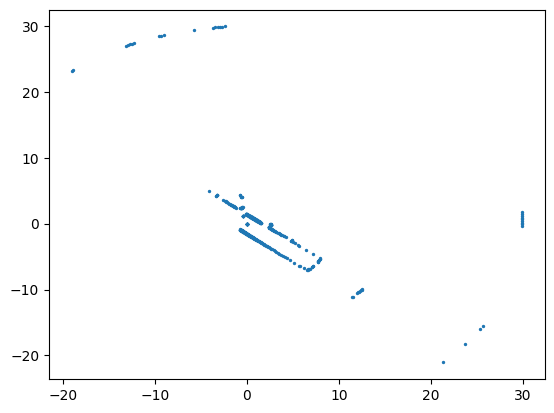

In [44]:
# Convert to x and y coordinates

dist = np.genfromtxt('laser.csv', delimiter=',')
angles = np.arange(135, -135, (-135 - 135) / dist.shape[0]) / 180 * np.pi

x = dist * np.cos(angles)
y = dist * np.sin(angles)

plt.scatter(x, y, s=2)

## Exercise 3.2

We would like to locate one of the walls in the dataset. To do so we will use [Ransac](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) to fine the best line fit in the noisy data. A Ransac regressor is initialized the following way using sklearn:

In [36]:
ransac = linear_model.RANSACRegressor()

Now that we have our Ransac regressor we can fit it to a dataset (x,y):

In [37]:
# Fit data
ransac.fit(x[:, np.newaxis], y)

RANSACRegressor()

Finally, to get the fitted line we can use the predict function. As an argument this takes the x values in which the line will be predicted:

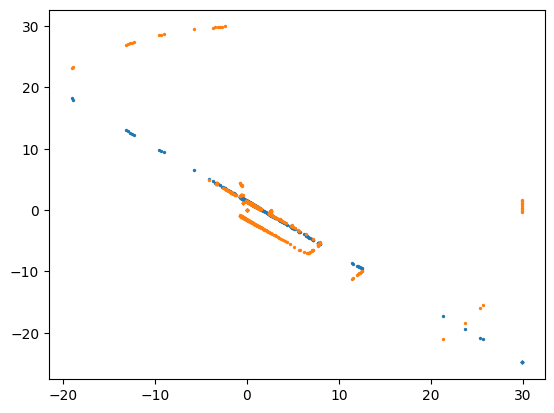

In [45]:
# Predict line
y_predic = ransac.predict(x[:, np.newaxis])
plt.scatter(x, y_predic, s=2)
plt.scatter(x, y, s=2)

Plot the line on top of the scatterplot from before to see the fit.

## Exercise 3.3

To see which data points were used to make the line fit and which were deemed outliers, we can use the function ransac.inlier_mask_

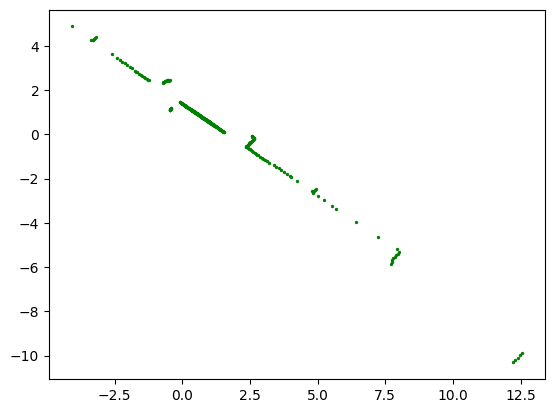

In [46]:
plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='green', s=2)

Find the second hallway wall using another Ransac fit and plot it together with the data points and the first ransac fit.

Hint: Use the outliers from the first Ransac.

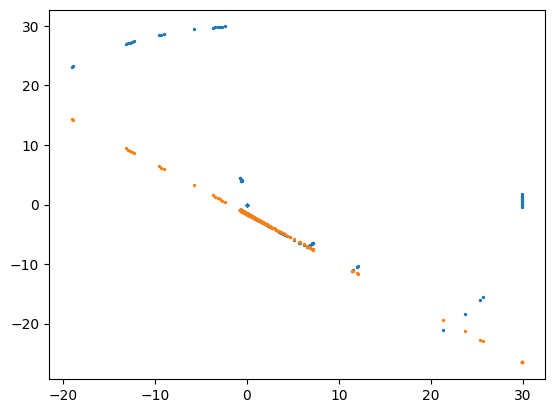

In [49]:
ransac2 = linear_model.RANSACRegressor()

x_outlier = x[~ransac.inlier_mask_]
y_outlier = y[~ransac.inlier_mask_]

plt.scatter(x_outlier, y_outlier, s=2)

ransac2.fit(x_outlier[:, np.newaxis], y_outlier)
y_outlier_predic = ransac2.predict(x_outlier[:, np.newaxis])

plt.scatter(x_outlier, y_outlier_predic, s=2)

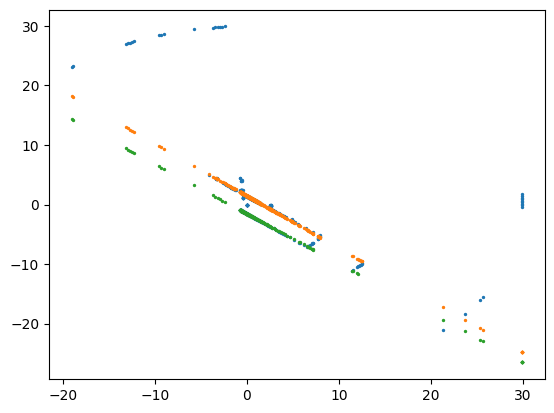

In [51]:
plt.scatter(x, y, s=2)
plt.scatter(x, y_predic, s=2)
plt.scatter(x_outlier, y_outlier_predic, s=2)